In [93]:
#%%imports
using CSV
using DataFrames
using Glob
using NaNStatistics
using Plots
using Random
using Revise

include(joinpath(@__DIR__, "../src/LVisP.jl"))
using .LVisP


In [94]:
#%%data loading
fnames = Glob.glob("*.csv", joinpath(@__DIR__,"../data/"))
println(fnames)
fname = fnames[1]
df = DataFrame(CSV.File(fname))

df_raw = subset(df, :processing => p -> p .== "raw")    #raw
df_pro = subset(df, :processing => p -> p .!= "raw")    #processed


theta_raw = sort(unique(df_raw[!,1]))
x_raw = map(x -> Vector(x[!,2]), collect(groupby(df_raw, 1; sort=true)))
y_raw = map(y -> Vector(y[!,3]), collect(groupby(df_raw, 1; sort=true)))
theta_pro = sort(unique(df_pro[!,1]))
x_pro = map(x -> Vector(x[!,2]), collect(groupby(df_pro, 1; sort=true)))
y_pro = map(y -> Vector(y[!,3]), collect(groupby(df_pro, 1; sort=true)))

# y_raw = map(y -> y .- nanminimum(y), y_raw)
# y_pro = map(y -> y .- nanminimum(y), y_pro)



# theta_raw   = theta_raw[1:1]
# theta_pro   = theta_pro[1:1]
# x_raw       = x_raw[    1:1]
# x_pro       = x_pro[    1:1]
# y_raw       = y_raw[    1:1]
# y_pro       = y_pro[    1:1]

# p = scatter(x_raw, y_raw)
# plot!(p, x_pro, y_pro)
# display(p)

["/home/lukas/github/LVisP/src_jl_demo/../data/00001_rrab_ogle.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/00015_rrc_ogle.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/02202_rrd_ogle.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/11370314_snib_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/114645810_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/11500415_sniin_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/120712717_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/122276966_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/124266324_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/132358631_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/13686088_snia_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/15108182_snic_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/18213902_sniip_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/1853138_sniil2_d

2-element Vector{Vector{Float64}}:
 [19.48545454545454, 19.522333333333336, 19.518863636363637, 19.539992424242428, 19.5765, 19.617594155844156, 19.60925324675325, 19.641818181818184, 19.650974025974026, 19.689357142857144  …  19.824636363636362, 19.824162337662333, 19.824, 19.803542207792216, 19.739837662337663, 19.617257575757577, 19.446215367965372, 19.208666666666666, 19.089008658008655, 19.119454545454545]
 [18.74418678688069, 18.77213782181572, 18.782085060975607, 18.786679204776423, 18.802712271341466, 18.823575750584006, 18.81911069314921, 18.859702065054446, 18.85540907012195, 18.863896854255824  …  18.53005456868723, 18.54155976776616, 18.544519969512194, 18.563119721227164, 18.575640528355652, 18.605836536245334, 18.635290396341464, 18.665151584974982, 18.677182868045595, 18.717017100755122]

In [95]:
#%%get stats
unique_thetas = unique(theta_raw)
nthetas = length(unique_thetas)

display(unique_thetas)
display(nthetas)

2-element Vector{Int64}:
 550
 810

2

In [ ]:
#%%get required parameters
thetalims = (minimum(theta_raw), maximum(theta_raw))
xticks = collect(range(floor(minimum(minimum.(x_raw))), ceil(maximum(maximum.(x_raw))), 5))
yticks = collect(range(floor(minimum(minimum.(y_raw))), ceil(maximum(maximum.(y_raw))), 5))

xticks = (xticks, ["x1 ", "x2 ", "x3 ", "x4 ", "x5 "])
yticks = (yticks, ["y1", "y2", "y3", "y4", "y5"])
# yticks = nothing
# yticks = [17, 21]

# display(thetalims)
# display(xticks)

2-element Vector{Int64}:
 17
 21

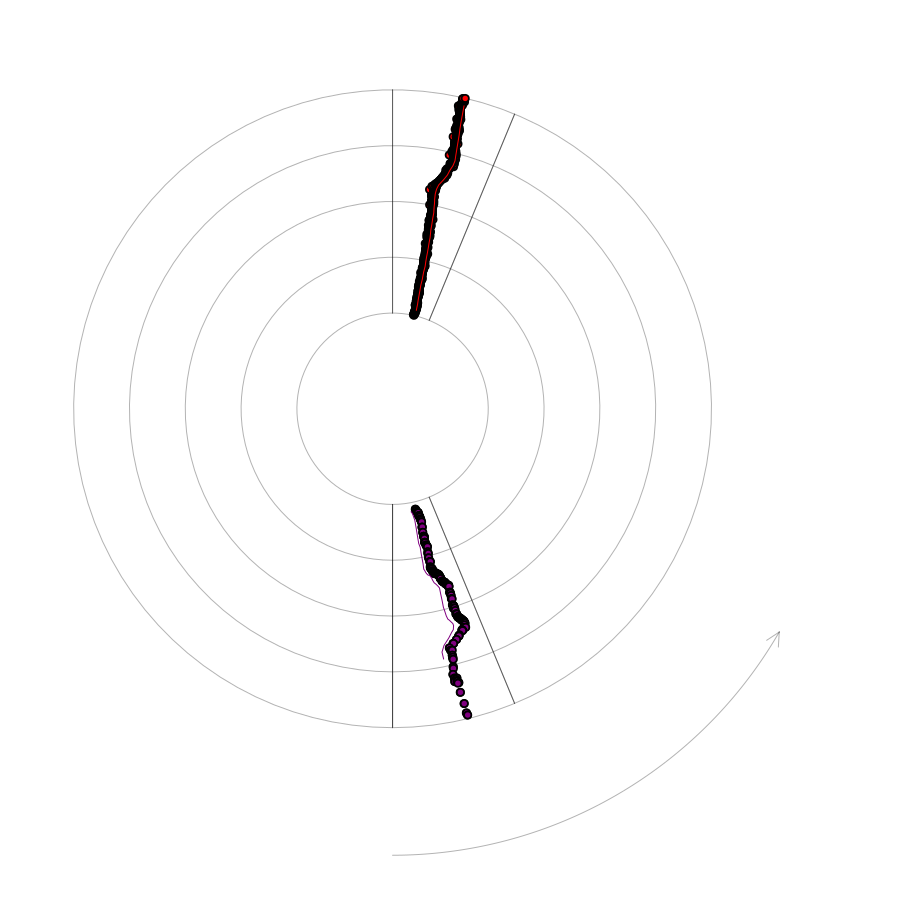

In [97]:
panelsize = pi/8

#%%plotting
LVPC = LVisP.LVisPCanvas(
    thetalims=thetalims, xticks=xticks,
    thetaguidelims=(-pi/2,3pi/2), thetaplotlims=(-pi/2+panelsize/2,pi/2-panelsize/2), xlimdeadzone=0.3, panelsize=panelsize,
    thetalabel=names(df_raw)[1], xlabel="\n$(names(df_raw)[2])" * " "^28, ylabel=names(df_raw)[3],
    th_arrowlength=pi/3,
    panelbounds=true, ygrid=true,
    fontsizes=(thetalabel=10, ylabel=9, xlabel=9, thetaticklabel=10, xticklabel=9, yticklabel=9),
    thetaarrowkwargs=(color=:black, alpha=0.3),
    thetaticklabelkwargs=(halign=:center,),
    thetalabelkwargs=(halign=:center,),
    xtickkwargs=(linecolor=:black, linealpha=0.3,),
    xticklabelkwargs=(rotation=0, halign=:right, valign=:bottom),
    xlabelkwargs=(rotation=-90, halign=:right, valign=:top),
    ygridkwargs=(linecolor=:black, linealpha=0.3, linestyle=:solid,),
    yticklabelkwargs=(rotation=0,),
    # ylabelkwargs=(rotation=0,),
    panelboundskwargs=(linecolor=:black, linealpha=0.5, linestyle=:solid,),
)
    
colors = palette(:rainbow, nthetas)

p = LVisP.plot(
    LVPC,
    theta_raw, x_raw, y_raw;
    yticks=yticks,
    thetaticklabels=["$thtl nm" for thtl in unique_thetas],
    plot_kwargs=[
    Dict(
        :mc=>colors[i], :label=>"",
        :seriestype=>:scatter,
    ) for i in eachindex(unique_thetas)]
)
plot!(p;
    size=(900,900),
    leftmargin=0Plots.mm, rightmargin=15Plots.mm,
    topmargin=15Plots.mm, bottommargin=0Plots.mm,
)

LVisP.plot!(
    LVPC,
    theta_pro, x_pro, y_pro;
    yticks=yticks,
    thetaticklabels=nothing,
    data_only=true,
    plot_kwargs=[Dict(
        :lc=>colors[i], :label=>"$(unique_thetas[i]) nm",
        :seriestype=>:path,
    ) for i in eachindex(unique_thetas)]
)

savefig(p, replace(fname, "./data/"=>"./gfx/", ".csv"=>".png"))
display(p)